In [246]:
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
exchange_binance = ccxt.binanceusdm()


In [248]:
column_name = ['time', 'open', 'high', 'low', 'close', 'volume']

#디파이 종합지수 
defi_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='DEFI/USDT', timeframe='1d', limit=400), columns = column_name)['close'])


# 추종지수
band_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='BAND/USDT', timeframe='1d', limit=400), columns=column_name)['close'])
comp_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='COMP/USDT', timeframe='1d', limit=400), columns=column_name)['close'])
kaba_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='KAVA/USDT', timeframe='1d', limit=400), columns=column_name)['close'])
knc_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='BAND/USDT', timeframe='1d', limit=400), columns=column_name)['close'])
#lend_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='LEND/USDT', timeframe='4h', limit=500), columns=column_name)['close'])
# 바이낸스 선물에 등록이 안되있는 코인
link_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='LINK/USDT', timeframe='1d', limit=400), columns=column_name)['close'])
mkr_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='MKR/USDT', timeframe='1d', limit=400), columns=column_name)['close'])
snx_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='SNX/USDT', timeframe='1d', limit=400), columns=column_name)['close'])
sxp_df =np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='SXP/USDT', timeframe='1d', limit=400), columns=column_name)['close'])
zrx_df = np.log(pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='ZRX/USDT', timeframe='1d', limit=400), columns=column_name)['close'])


In [249]:
defi_df = defi_df/defi_df[0]

band_df = band_df/band_df[0]
comp_df = comp_df/comp_df[0]
kaba_df = kaba_df/kaba_df[0]
knc_df = knc_df/knc_df[0]
link_df = knc_df/knc_df[0]
mkr_df = mkr_df/mkr_df[0]
snx_df = snx_df/snx_df[0]
sxp_df = sxp_df/sxp_df[0]
zrx_df = zrx_df/zrx_df[0]


In [250]:
#p.corrcoef(defi_df,sxp_df)
#np.cov(defi_df,band_df)

In [251]:
M = np.array([#band_df.values,
            #comp_df.values,
            #kaba_df.values,
            #knc_df.values,
            link_df.values])#, 
            #mkr_df.values,
            #snx_df.values,
            #zrx_df.values,
            #sxp_df.values])
M=M.T


In [252]:
M_M_inv = np.linalg.pinv((M.T @ M))
beta = M_M_inv@M.T@defi_df.values
beta

array([1.07743072])

In [253]:
basket = M@beta

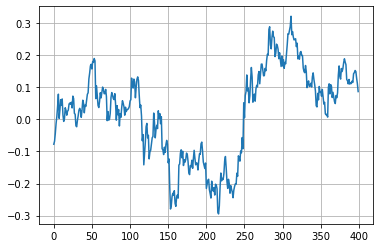

In [254]:
spread = defi_df - basket
plt.plot(spread)
plt.grid()

In [255]:
from statsmodels.tsa.stattools import adfuller
adfuller(x=spread)


(-1.9902580026314034,
 0.290860894047495,
 1,
 398,
 {'1%': -3.4468876315017423,
  '5%': -2.868829424528516,
  '10%': -2.570653059771218},
 -1585.1358809161957)

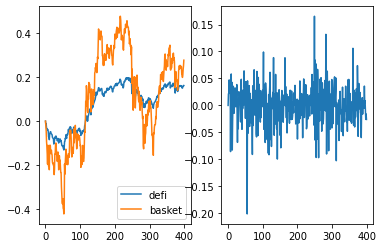

In [256]:
defi_logrt = defi_df.pct_change()
basket_logrt = pd.DataFrame(basket).pct_change()

basket_logrt = basket_logrt.fillna(0)
defi_logrt = defi_logrt.fillna(0)

plt.subplot(1,2,1)
plt.plot(defi_logrt.cumsum() , label='defi')
plt.plot(basket_logrt.cumsum(), label='basket')
plt.legend()

plt.subplot(1,2,2)
plt.plot(defi_logrt-basket_logrt)


In [257]:
import statsmodels.api as sm;

dfy = defi_logrt.values
dfx = sm.add_constant(basket_logrt.values)

linear = sm.OLS(dfy, dfx)
result = linear.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     913.1
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          4.45e-105
Time:                        01:26:51   Log-Likelihood:                 1550.3
No. Observations:                 400   AIC:                            -3097.
Df Residuals:                     398   BIC:                            -3089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.053      0.293      -0.000       0.001
x1             0.2013      0.007     30.217      0.000       0.188       0.214
==============================================================================
Omnibus:                       52.281   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.407
Skew:                          -0.526   Prob(JB):                     2.02e-41
Kurtosis:                       6.184   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""